In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import os
from rdb_functions import generate_b1_b0
from rdb_functions import fill_nas


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data_bj=pd.read_csv(os.path.join('data','BJ_to_model.csv'))
data_gam=pd.read_csv(os.path.join('data','GAM_to_model.csv'))

# var_drop='tvivhab tvivpar vivpar_hab vivpar_ut tvivhab tvivpar vivpar_hab vivpar_ut pct_t_inhab_hh pct_privhh pct_privhh_inhab pct_hhtemp'.split()
# data.drop(columns=var_drop,inplace=True)

In [4]:
cl=[i not in list(data_bj) for i in list(data_gam)]
list(compress(list(data_gam),cl))

['Price_m2']

In [5]:
print(data_bj.shape)
print(data_gam.shape)

(367, 32)
(345, 32)


In [6]:
data_gam.rename(columns={'Price_m2':'price_m2'},inplace=True)

In [7]:
data_bj['bj']=1
data_gam['bj']=0
data=data_gam.append(data_bj,ignore_index=True)
# data=data_bj

In [8]:
data_20=data[data['tiempo']==2020]
data_10=data[data['tiempo']==2010]

print(data_20.shape)
print(data_10.shape)

(351, 33)
(351, 33)


In [14]:
Q1 = data_20['price_m2'].quantile(0.25)
Q3 = data_20['price_m2'].quantile(0.75)
IQR = Q3 - Q1

cl=(data['price_m2'] < (Q1 - 1.5 * IQR)) |(data['price_m2'] > (Q3 + 1.5 * IQR))
data_20=data[(data['tiempo']==2020)&~cl].reset_index(drop=True)
data_10=data[(data['tiempo']==2010)&~cl].reset_index(drop=True)
print(data_20.shape)
print(data_10.shape)


(345, 33)
(345, 33)


30


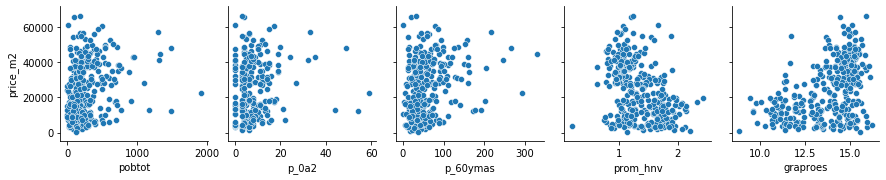

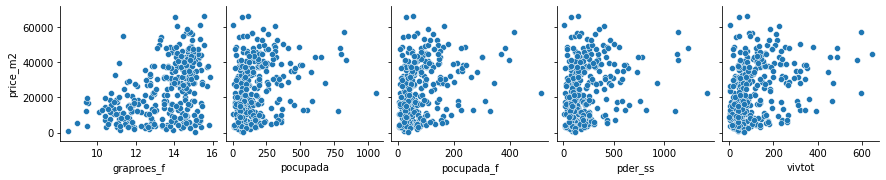

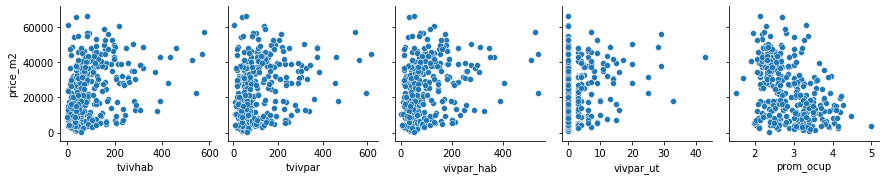

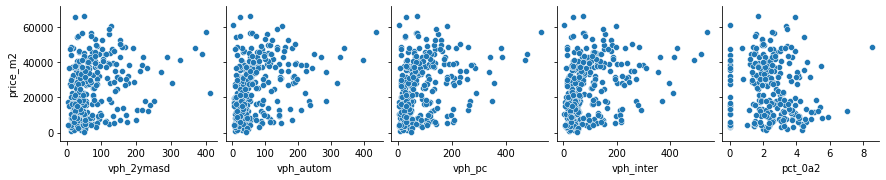

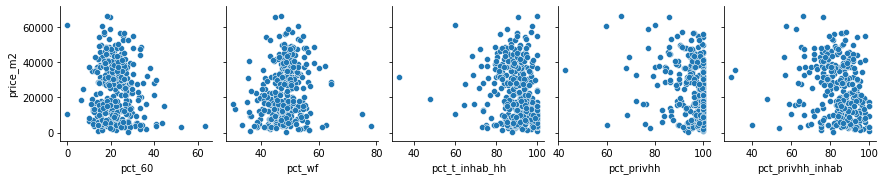

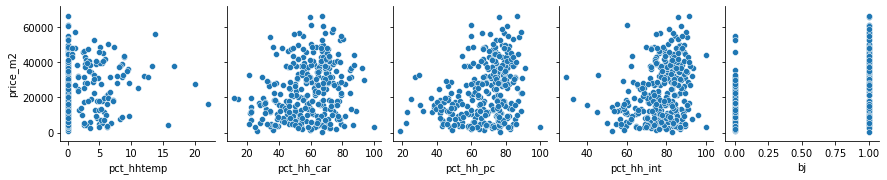

In [59]:
variables_plot=list(data_20.drop(columns=['id','price_m2','tiempo']))
total=len(variables_plot)
print(total)
i=0
while i<total:
    
    try:
        pp = sns.pairplot(data=data_20,
                      y_vars=['price_m2'],
                      x_vars=variables_plot[i:i+5])
        i=i+5
    except:
        pp = sns.pairplot(data=data_20,
                      y_vars=['price_m2'],
                      x_vars=variables_plot[i:])
    
    

In [48]:
for i in ['price_m2','pct_wf','pct_hh_pc']:

    Q1 = data_20[i].quantile(0.25)
    Q3 = data_20[i].quantile(0.75)
    IQR = Q3 - Q1

    cl=(data[i] < (Q1 - 1.5 * IQR)) | (data[i] > (Q3 + 1.5 * IQR))
    
    data_20=data[(data['tiempo']==2020)&~cl].reset_index(drop=True)
    data_10=data[(data['tiempo']==2010)&~cl].reset_index(drop=True)
    
print(data_20.shape)
print(data_10.shape)



(343, 33)
(320, 33)


In [51]:
Q1 = data_20['price_m2'].quantile(0.25)
Q3 = data_20['price_m2'].quantile(0.75)
IQR = Q3 - Q1

In [52]:
cl=(data['price_m2'] < (Q1 - 1.5 * IQR)) |(data['price_m2'] > (Q3 + 1.5 * IQR))
data_20=data[(data['tiempo']==2020)&~cl].reset_index(drop=True)
data_10=data[(data['tiempo']==2010)&~cl].reset_index(drop=True)
print(data_20.shape)
print(data_10.shape)

(345, 33)
(345, 33)


In [53]:
Q1 = data['pct_wf'].quantile(0.25)
Q3 = data['pct_wf'].quantile(0.75)
IQR = Q3 - Q1

In [54]:
cl=(data_20['pct_wf'] < (Q1 - 1.5 * IQR)) |(data_20['pct_wf'] > (Q3 + 1.5 * IQR))
data_20=data_20[~cl].reset_index(drop=True)
data_10=data_10[~cl].reset_index(drop=True)
print(data_20.shape)
print(data_10.shape)

(335, 33)
(335, 33)


In [55]:
print(data_10['pct_wf'].mean())
print(data_20['pct_wf'].mean())
data_10.head(1)

45.59705553611079
47.745877399690244


,id,price_m2,tiempo,pobtot,p_0a2,p_60ymas,prom_hnv,graproes,graproes_f,pocupada,pocupada_f,pder_ss,vivtot,tvivhab,tvivpar,vivpar_hab,vivpar_ut,prom_ocup,vph_2ymasd,vph_autom,vph_pc,vph_inter,pct_0a2,pct_60,pct_wf,pct_t_inhab_hh,pct_privhh,pct_privhh_inhab,pct_hhtemp,pct_hh_car,pct_hh_pc,pct_hh_int,bj
0,00500010101014,747.556351,2010.0,151.0,9.0,16.0,2.45,8.55,8.24,52.0,12.0,98.0,38.0,NaN,NaN,NaN,NaN,4.03,22.0,11.0,12.0,7.0,5.960265,10.596026,23.076923,NaN,NaN,NaN,NaN,28.947368,31.578947,18.421053,0


In [56]:
Q1 = data['pct_hh_pc'].quantile(0.25)
Q3 = data['pct_hh_pc'].quantile(0.75)
IQR = Q3 - Q1

cl=(data_20['pct_hh_pc'] < (Q1 - 1.5 * IQR)) |(data_20['pct_hh_pc'] > (Q3 + 1.5 * IQR))
data_20=data_20[~cl].reset_index(drop=True)
data_10=data_10[~cl].reset_index(drop=True)
print(data_20.shape)
print(data_10.shape)

(334, 33)
(334, 33)


In [18]:
X=data_20.drop(columns=['price_m2','id','tiempo'])
y=data_20.price_m2

In [19]:
nas=X.isna().sum()

In [20]:
nas

pobtot                0
p_0a2                86
p_60ymas             11
prom_hnv             11
graproes             11
graproes_f           11
pocupada             11
pocupada_f           12
pder_ss              11
vivtot                0
tvivhab               1
tvivpar              12
vivpar_hab           13
vivpar_ut           115
prom_ocup            11
vph_2ymasd           14
vph_autom            13
vph_pc               12
vph_inter            12
pct_0a2              86
pct_60               11
pct_wf               12
pct_t_inhab_hh        2
pct_privhh           12
pct_privhh_inhab     13
pct_hhtemp          115
pct_hh_car           13
pct_hh_pc            12
pct_hh_int           12
bj                    0
dtype: int64

## Filling NAs with linear regression

In [43]:
variables_kept=['pct_hh_pc','pct_wf','pobtot','pct_hh_car']
X_filled=X[variables_kept].copy()

for column in list(X_filled):
    b1_b0=generate_b1_b0(X,'pobtot',column)
    X_filled[column]=fill_nas(X_filled[column],X_filled['pobtot'],b1_b0)

In [44]:
print(X_filled.isna().sum())
print(X_filled.shape)

pct_hh_pc     0
pct_wf        0
pobtot        0
pct_hh_car    0
dtype: int64
(345, 4)


## Standarizing features

In [45]:
X_filled.drop(columns=['pobtot'],inplace=True)
scaler = preprocessing.StandardScaler().fit(X_filled)
X_scaled = scaler.transform(X_filled)

## Splitting in train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.33, random_state=42)

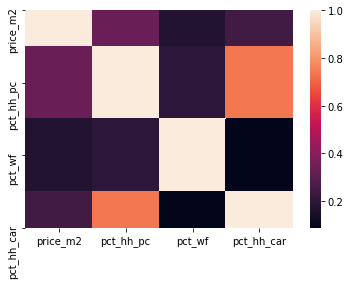

In [47]:
sns.heatmap((data_20[['price_m2','pct_hh_pc','pct_wf','pct_hh_car']]).corr())

### Gradient Boosting Regressor

In [48]:
gbr = GradientBoostingRegressor(
learning_rate=0.1,
n_estimators=200,
subsample=0.6,
random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

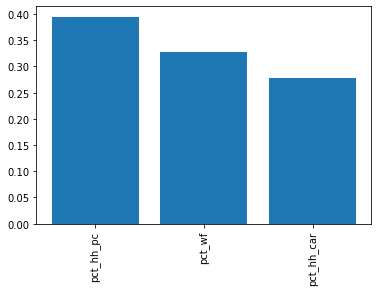

In [49]:
# feature importances from random forest model
importances = gbr.feature_importances_
# index of greatest to least feature importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
# create tick labels
feature_names=list(X_filled)
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [61]:
X_10=data_10.drop(columns=['price_m2','id','tiempo'])

X_filled_10=X_10[variables_kept].copy()

for column in list(X_filled_10):
    b1_b0=generate_b1_b0(X_filled_10,'pobtot',column)
    X_filled_10[column]=fill_nas(X_filled_10[column],X_filled_10['pobtot'],b1_b0)

X_filled_10.drop(columns=['pobtot'],inplace=True)
    
gbr.predict(X_filled_10)
    
growth=100*(y/gbr.predict(X_filled_10))-100
    
predictions=pd.DataFrame({'precio m2 2010 predicted':gbr.predict(X_filled_10),
               'precio m2 2020':y,
               'growth':100*(y/gbr.predict(X_filled_10))-100})

In [60]:
print(data_10.shape)
print(X_filled_10.shape)

(345, 33)
(345, 3)


In [62]:
data_10['growth']=growth
results=data_10[['id','growth']]

In [52]:
predictions.describe()

,precio m2 2010 predicted,precio m2 2020,growth
count,345.000000,345.000000,345.000000
mean,18201.098352,23413.633102,457.541401
std,8292.299539,15648.499644,7125.955159
min,30.143547,567.164179,-95.320427
25%,12119.393159,9771.863118,-40.236409
50%,17180.512272,20029.673591,20.032632
75%,24106.023913,36901.768684,112.212938
max,43454.095414,66483.516484,132377.219737


In [65]:
predictions.sort_values('precio m2 2020')

,precio m2 2010 predicted,precio m2 2020,growth
271,6609.059246,567.164179,-91.418383
0,15974.882551,747.556351,-95.320427
42,26214.287985,1706.003077,-93.492087
108,21438.191106,1755.929766,-91.809338
89,13523.142497,1875.000000,-86.134880
164,20325.550966,2051.730000,-89.905661
26,16825.752834,2298.542400,-86.339141
228,12006.912710,2445.783133,-79.630208
71,20847.276380,2620.689655,-87.429103
41,28961.079080,2815.856846,-90.277100


185
325


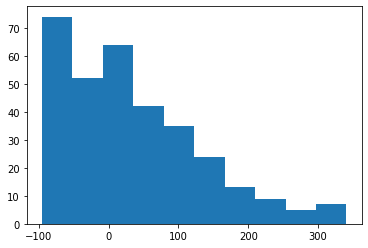

In [63]:
Q1 = growth.quantile(0.25)
Q3 = growth.quantile(0.75)
IQR = Q3 - Q1

cl=(growth < (Q1 - 1.5 * IQR)) |(growth > (Q3 + 1.5 * IQR))
results=results[~cl]

plt.hist(results['growth'])
print((results['growth']>0).sum())
print(len(results['growth']))

In [64]:
results.to_csv(os.path.join('data','results.csv'),index=False)

Percentage change in pct_hh_pc


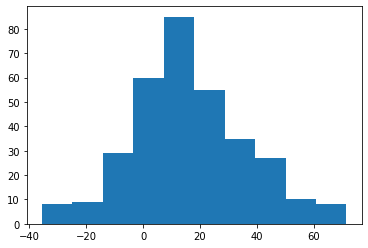

Percentage change in pct_wf


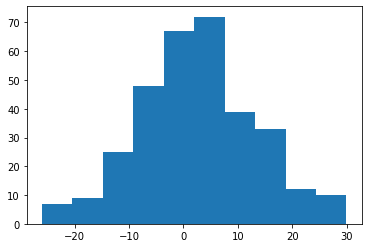

Percentage change in pct_hh_car


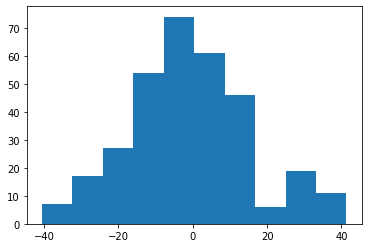

In [55]:
for column in list(X_filled):
    change=100*(X_filled[column]/(1+X_filled_10[column]))-100
    Q1 = change.quantile(0.25)
    Q3 = change.quantile(0.75)
    IQR = Q3 - Q1

    cl=(change < (Q1 - 1.5 * IQR)) |(change > (Q3 + 1.5 * IQR))
    change=change[~cl]

    print(f'Percentage change in {column}')
    plt.hist(change)
    plt.show()
    

In [56]:
import statsmodels.api as sm
model = LinearRegression()
    
model.fit(X_filled, y)
model = LinearRegression().fit(X_filled, y)


pd.DataFrame({'names':list(X_filled),
              'coeff':model.coef_})


est = sm.OLS(y, X_filled)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:               price_m2   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.724
Method:                 Least Squares   F-statistic:                              302.7
Date:                Wed, 17 Feb 2021   Prob (F-statistic):                    7.06e-96
Time:                        09:59:41   Log-Likelihood:                         -3800.6
No. Observations:                 345   AIC:                                      7607.
Df Residuals:                     342   BIC:                                      7619.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------